# Cluster Analysis on Market Segmentation

The example works on a data frame in the context of market segmentation. Data is available on 30 observations with customers regarding the two variables 1) satisfaction and 2) loyalty. Loyalty was measured by a standardized index ranging from -2.5 to +2.5. Satisfaction was measured by a 10 point Likert Scale.

## Import the relevant libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles to seaborn
sns.set()

# Import the KMeans module from sklearn
from sklearn.cluster import KMeans

## Load the data

In [6]:
# Load data frame
data = pd.read_csv ('market_segment_data.csv')

In [7]:
# Check data frame
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


In [8]:
data.describe()

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


## Plot the data

Preliminary plot of the data with the two features on the axes

Text(0, 0.5, 'Loyalty')

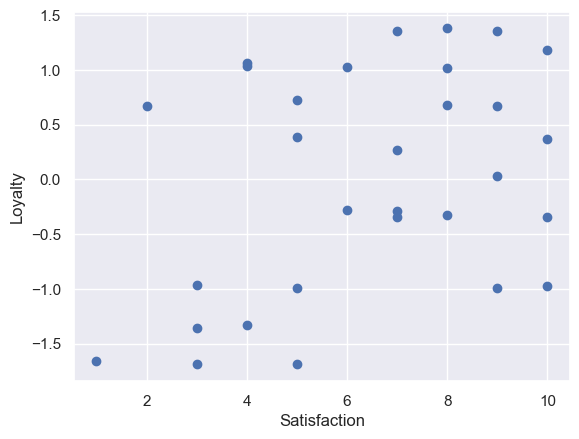

In [11]:
# Creating a scatter plot of the two variables
plt.scatter(data['Satisfaction'],data['Loyalty'])
# Definition of axes 
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Select the features

In [13]:
# Select both features by creating a copy of the data variable
x = data.copy()

## Define the Model for Clustering

In [15]:
# Create an object (call it kmeans)
# Deploy the KMeans algorithm on the object
# The number in brackets is the number of clusters we are aiming for
kmeans = KMeans(3)

# Fit the data on the data variable
kmeans.fit(x)

C:\Users\rossmaal\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

## Predict Clustering Results

In [17]:
# Create a copy of the input data
clusters = x.copy()

# Take note of the predicted clusters 
clusters['cluster_pred']=kmeans.fit_predict(x)

clusters

C:\Users\rossmaal\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,0
4,4,1.06,2
5,1,-1.66,2
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

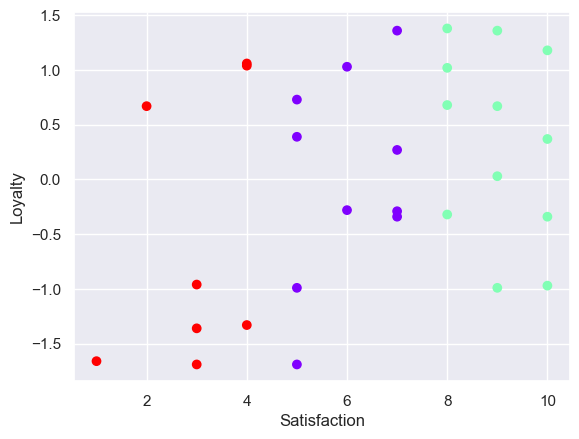

In [18]:
# Plot the data using the two features
# c (color) is an argument which could be coded with a variable 
# The variable in this case has the values 0 and 1 indicating to plt.scatter that there are two colors (0,1)
# All points in cluster 0 will be the same colour, all points in cluster 1 another one
# cmap is the color map. Rainbow is a nice one - but check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Standardize the variables

Let's standardize and check the new result

In [21]:
# Import a module which can do standardizing
from sklearn import preprocessing

# Scale the inputs
# preprocessing.scale scales each variable (column in x) with respect to itself
# The new result is an array
x_scaled = preprocessing.scale(x)

x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Apply the Elbow method

In [23]:
# Create an empty list to collect the WCSS values
wcss =[]

# Create all possible cluster solutions with WCSS with a loop
# In the loop defined are solutions from 1 to 9 clusters

for i in range(1,10):
    # Cluster solution with i clusters
    kmeans = KMeans(i)
    # Fit the standardized data
    kmeans.fit(x_scaled)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\rossmaal\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rossmaal\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rossmaal\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rossmaal\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.p

[60.0,
 29.818973034723147,
 18.32589143135198,
 10.24718180592842,
 9.779007459660164,
 6.586212092192187,
 5.490486466725132,
 4.97556086317005,
 3.8067995963754533]

Text(0, 0.5, 'WCSS')

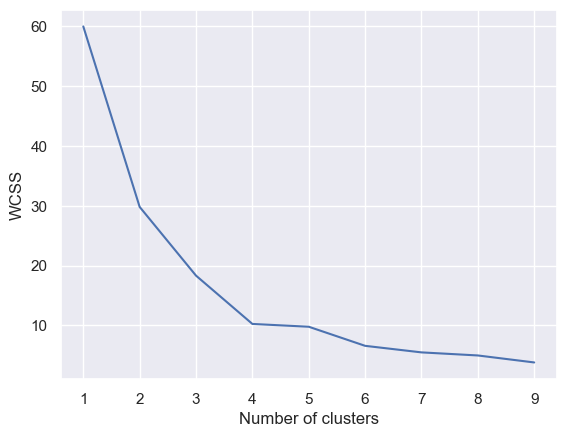

In [24]:
# Plot the number of clusters together with WCSS
plt.plot(range(1,10),wcss)

# Define the axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Explore clustering solutions and select the number of clusters

In [26]:
# Variate K (the number of clusters)
kmeans_new = KMeans(4)
# Fit the data
kmeans_new.fit(x_scaled)
# Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

C:\Users\rossmaal\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rossmaal\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
# Check if everything seems right
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,3
2,5,-0.99,2
3,7,-0.29,3
4,4,1.06,0
5,1,-1.66,2
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,1
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

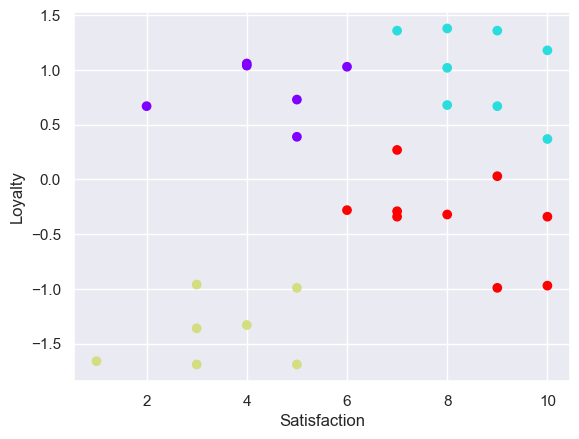

In [28]:
# Plot
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')